In [1]:
#Dataset: https://www.kaggle.com/datasets/vishalsubbiah/pokemon-images-and-types?resource=download

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd "/content/drive/MyDrive/IA/Pokemon"
!ls

/content/drive/MyDrive/IA/Pokemon
images	PokemonCNN.ipynb  pokemon.csv


# Explore the data

Read the csv information and images, and display examples of images.

In [4]:
import os
import numpy as np
import pandas as pd
import cv2 
import matplotlib.pyplot as plt

IMAGES_PATH ="/content/drive/MyDrive/IA/Pokemon/images/train/images"

pokemon = pd.read_csv('pokemon.csv')
pokemon = pokemon.sort_values(by='Name')

display(pokemon.head())
display(pokemon.describe())
pokemonTypes = pokemon['Type1'].unique()
display(pokemonTypes)
print("Number of pokemon types:", len(pokemonTypes))

,Name,Type1,Type2
459,abomasnow,Grass,Ice
62,abra,Psychic,NaN
358,absol,Dark,NaN
616,accelgor,Bug,NaN
680,aegislash-blade,Steel,Ghost


,Name,Type1,Type2
count,809,809,405
unique,809,18,18
top,abomasnow,Water,Flying
freq,1,114,95


array(['Grass', 'Psychic', 'Dark', 'Bug', 'Steel', 'Rock', 'Normal',
       'Water', 'Dragon', 'Electric', 'Poison', 'Fire', 'Fairy', 'Ice',
       'Ground', 'Ghost', 'Fighting', 'Flying'], dtype=object)

Number of pokemon types: 18


File names from images:

['doduo.png', 'dodrio.png', 'donphan.png', 'doublade.png', 'ditto.png', 'electabuzz.png', 'dragalge.png', 'druddigon.png', 'ducklett.png', 'dustox.png', 'duosion.png', 'dwebble.png', 'eevee.png', 'eelektross.png', 'electrode.png', 'drilbur.png', 'duskull.png', 'drowzee.png', 'drifloon.png', 'ekans.png', 'eelektrik.png', 'electrike.png', 'durant.png', 'drifblim.png', 'drampa.jpg', 'dragonite.png', 'dragonair.png', 'dusknoir.png', 'electivire.png', 'drapion.png', 'elekid.png', 'elgyem.png', 'dunsparce.png', 'dugtrio.png', 'dratini.png', 'dusclops.png', 'emboar.png', 'empoleon.png', 'exploud.png', 'flaaffy.png', 'fletchling.png', 'fletchinder.png', 'espurr.png', 'exeggcute.png', 'ferroseed.png', 'fennekin.png', 'forretress.png', 'flygon.png', 'feraligatr.png', 'florges.png', 'entei.png', 'fomantis.jpg', 'flabebe.png', 'foongus.png', 'excadrill.png', 'farfetchd.png', 'floatzel.png', 'finneon.png', 'emolga.png', 'espeon.png', 'flareon.png', 'ferrothorn.png', 'feebas

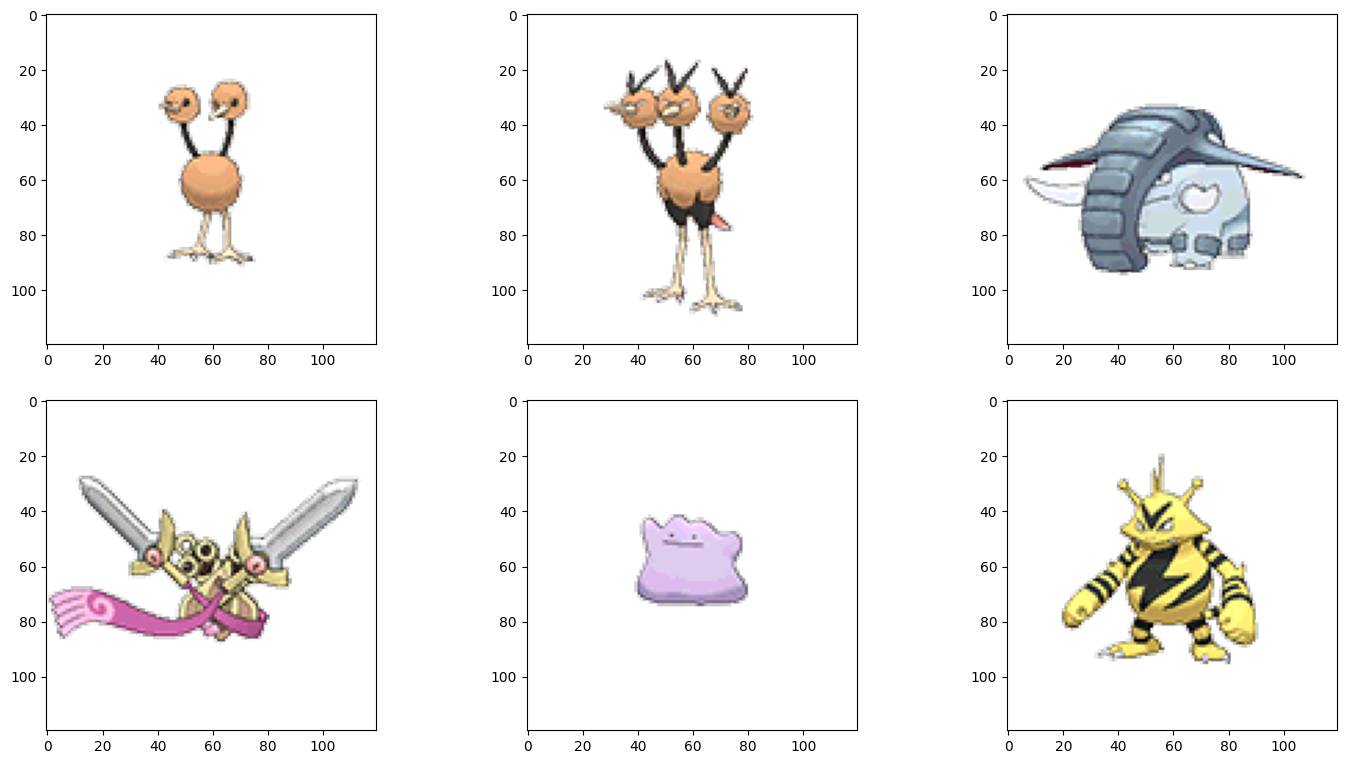

In [5]:
# Display Images
from PIL import Image

trainImages = os.listdir(IMAGES_PATH)
print("File names from images:\n")
print(trainImages)

# plot here
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
first_five = trainImages[0:6]

def subplots():
# Use the axes for plotting
    i = 0
    j = 0
    k = 0
    for k in range(6):
        state = os.path.join(IMAGES_PATH, first_five[k])
        img = Image.open(state)
        axes[i,j].imshow(img)
        
        if k==2:
            i +=1
            j = 0
        else:
            j += 1


    plt.tight_layout(pad=2);
    
subplots()

# Preprocessing Data

Take each pokemon with your main type

In [6]:
data_dict = {}

for key, val in zip(pokemon["Name"], pokemon["Type1"]):
    data_dict[key] = val
print(data_dict)

{'abomasnow': 'Grass', 'abra': 'Psychic', 'absol': 'Dark', 'accelgor': 'Bug', 'aegislash-blade': 'Steel', 'aerodactyl': 'Rock', 'aggron': 'Steel', 'aipom': 'Normal', 'alakazam': 'Psychic', 'alomomola': 'Water', 'altaria': 'Dragon', 'amaura': 'Rock', 'ambipom': 'Normal', 'amoonguss': 'Grass', 'ampharos': 'Electric', 'anorith': 'Rock', 'araquanid': 'Water', 'arbok': 'Poison', 'arcanine': 'Fire', 'arceus': 'Normal', 'archen': 'Rock', 'archeops': 'Rock', 'ariados': 'Bug', 'armaldo': 'Rock', 'aromatisse': 'Fairy', 'aron': 'Steel', 'articuno': 'Ice', 'audino': 'Normal', 'aurorus': 'Rock', 'avalugg': 'Ice', 'axew': 'Dragon', 'azelf': 'Psychic', 'azumarill': 'Water', 'azurill': 'Normal', 'bagon': 'Dragon', 'baltoy': 'Ground', 'banette': 'Ghost', 'barbaracle': 'Rock', 'barboach': 'Water', 'basculin-red-striped': 'Water', 'bastiodon': 'Rock', 'bayleef': 'Grass', 'beartic': 'Ice', 'beautifly': 'Bug', 'beedrill': 'Bug', 'beheeyem': 'Psychic', 'beldum': 'Steel', 'bellossom': 'Grass', 'bellsprout': 

Create a dictionary and assign each label in labels list a unique id from 1 to 18. Name the dictionary as "labels_idx

In [7]:
IDs = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
labels_idx = dict(zip(pokemonTypes,IDs))

print(labels_idx)

{'Grass': 0, 'Psychic': 1, 'Dark': 2, 'Bug': 3, 'Steel': 4, 'Rock': 5, 'Normal': 6, 'Water': 7, 'Dragon': 8, 'Electric': 9, 'Poison': 10, 'Fire': 11, 'Fairy': 12, 'Ice': 13, 'Ground': 14, 'Ghost': 15, 'Fighting': 16, 'Flying': 17}


Usamos ImageDataGenerator para generar imagenes nuevas en el ram mientras entrenamos para no desperdiciar espacio.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


path = "/content/drive/MyDrive/IA/Pokemon"

base_dir = 'images'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = 40,
							width_shift_range = 0.2,
							height_shift_range = 0.2,
							shear_range = 0.3,
							zoom_range = 0.3,
							horizontal_flip = True,)

para ello tenemos que asignar una fuente base de imágenes a modificar, en este caso tomamos las de el directorio de train, en este caso solo estamos tomando una imagen y estamos mostrando como se generarían 5 imágenes diferentes:

Found 647 images belonging to 1 classes.


<Figure size 640x480 with 0 Axes>

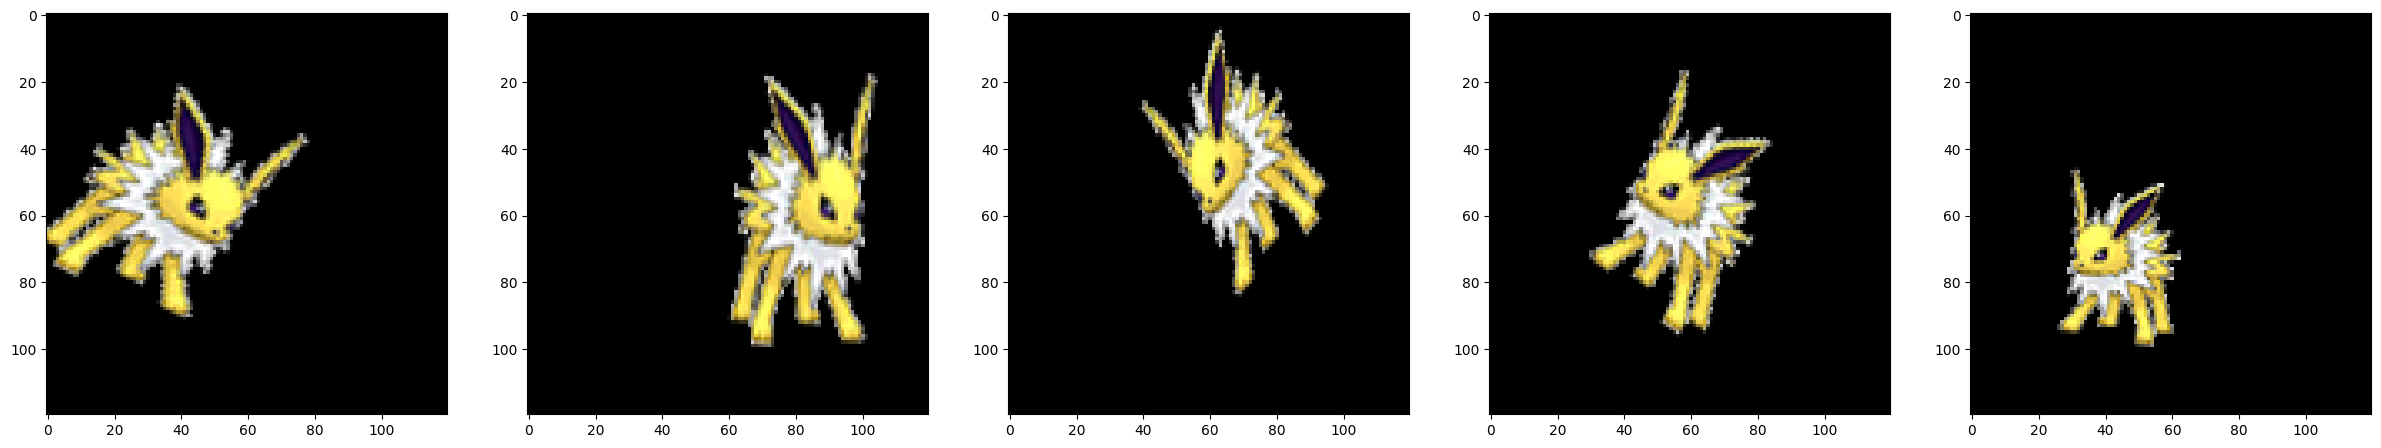

In [9]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (120, 120),
							batch_size = 1,
							class_mode ='categorical',
							)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 5, figsize=(30, 8)) 

for i in range(5) :
  axarr[i].imshow(train_generator[0][0][0])

En este caso estamos tomando 8 imágenes y estomos modificando todas 1 vez cada una y las mostramos a manera de ejemplo.

Found 647 images belonging to 1 classes.
(8, 120, 120, 3)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


<Figure size 640x480 with 0 Axes>

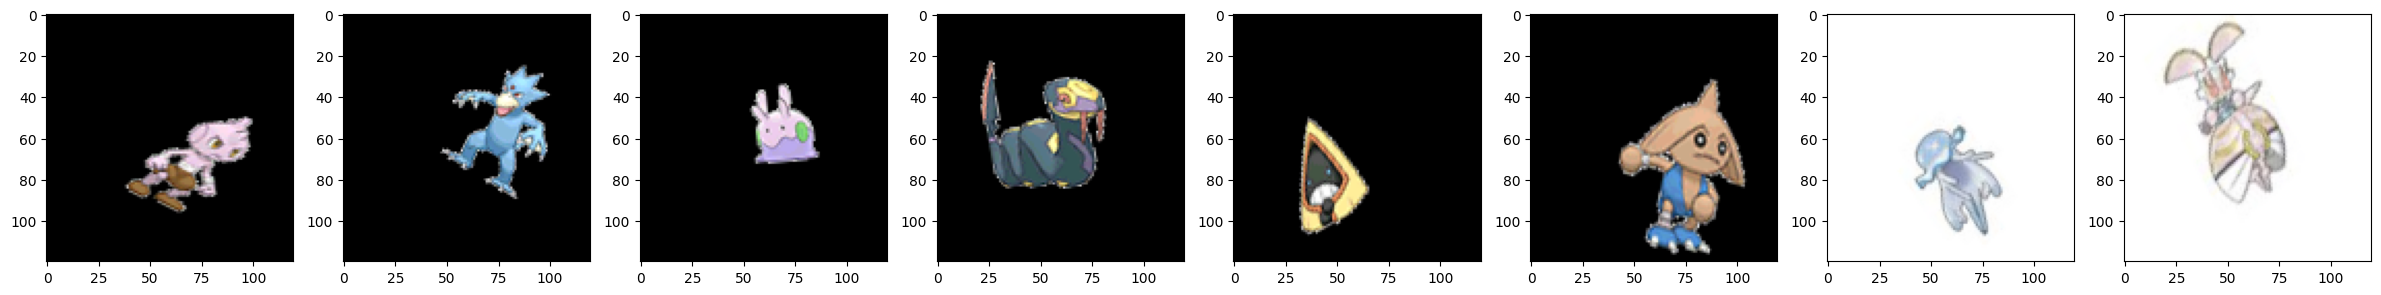

In [10]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (120, 120),
							batch_size = 8,
							class_mode ='categorical',
							)


images , labels = train_generator[0]

print(images.shape)

plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4)) 

for i in range(images.shape[0]) :  
  axarr[i].imshow(images[i])

También podemos configurar la generación de imágenes para que cada una se salve en el disco duro, de esta forma podemos ver posteriormente con qué imágenes entrenó el modelo.

In [17]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (120, 120),
							batch_size = 647,
							class_mode ='categorical'
							)

Found 647 images belonging to 1 classes.


In [18]:
image_names = train_generator.filenames
print(image_names)

['images/ditto.png', 'images/dodrio.png', 'images/doduo.png', 'images/donphan.png', 'images/doublade.png', 'images/dragalge.png', 'images/dragonair.png', 'images/dragonite.png', 'images/drampa.jpg', 'images/drapion.png', 'images/dratini.png', 'images/drifblim.png', 'images/drifloon.png', 'images/drilbur.png', 'images/drowzee.png', 'images/druddigon.png', 'images/ducklett.png', 'images/dugtrio.png', 'images/dunsparce.png', 'images/duosion.png', 'images/durant.png', 'images/dusclops.png', 'images/dusknoir.png', 'images/duskull.png', 'images/dustox.png', 'images/dwebble.png', 'images/eelektrik.png', 'images/eelektross.png', 'images/eevee.png', 'images/ekans.png', 'images/electabuzz.png', 'images/electivire.png', 'images/electrike.png', 'images/electrode.png', 'images/elekid.png', 'images/elgyem.png', 'images/emboar.png', 'images/emolga.png', 'images/empoleon.png', 'images/entei.png', 'images/escavalier.png', 'images/espeon.png', 'images/espurr.png', 'images/excadrill.png', 'images/exeggcu

In [19]:
images , labels = train_generator[0]

print(images.shape)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


(647, 120, 120, 3)


In [16]:
labels.shape

(647, 1)

Obtenemos los labels correspondientes

In [20]:
final_images = []
final_labels = []
count = 0

for file in image_names:
    name = file.split('/')[-1].split('.')[0]
    label = labels_idx[data_dict[name]]
    # append label in final_labels list
    final_labels.append(np.array(label))
   
# converting lists into numpy arrayn
# normalizing and reshaping the data 
final_labels = np.array(final_labels, dtype = np.int8).reshape(647, 1)

In [22]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(images, final_labels, test_size=0.2, random_state=42)

# Verificar las formas de los conjuntos de datos resultantes
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (517, 120, 120, 3)
Forma de X_test: (130, 120, 120, 3)
Forma de y_train: (517, 1)
Forma de y_test: (130, 1)
